In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/refs/heads/master/heart.csv"
heart_df = pd.read_csv(url)
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [34]:
padronizando = StandardScaler()
heart_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = padronizando.fit_transform(
    heart_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
)
print(heart_df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.952197    1   3  0.763956 -0.256334    1        0  0.015443      0   
1 -1.915313    1   2 -0.092738  0.072199    0        1  1.633471      0   
2 -1.474158    0   1 -0.092738 -0.816773    0        0  0.977514      0   
3  0.180175    1   1 -0.663867 -0.198357    0        1  1.239897      0   
4  0.290464    0   0 -0.663867  2.082050    0        1  0.583939      1   

    oldpeak  slope  ca  thal  target  
0  1.087338      0   0     1       1  
1  2.122573      0   0     2       1  
2  0.310912      2   0     2       1  
3 -0.206705      2   0     2       1  
4 -0.379244      2   0     2       1  


In [ ]:
X = heart_df.drop(columns=['target'])
y = heart_df['target']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#knn = KNeighborsClassifier(n_neighbors=5)
accuracies = []
for i in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia para k={i}: {accuracy * 100:.2f}%")
    accuracies.append(accuracy)


Accuracy for k=1: 80.33%
Accuracy for k=3: 77.05%
Accuracy for k=5: 80.33%
Accuracy for k=7: 77.05%
Accuracy for k=9: 80.33%
Accuracy for k=11: 78.69%
Accuracy for k=13: 78.69%
Accuracy for k=15: 78.69%
Accuracy for k=17: 75.41%
Accuracy for k=19: 77.05%
Accuracy for k=21: 75.41%
Accuracy for k=23: 70.49%
Accuracy for k=25: 72.13%
Accuracy for k=27: 72.13%
Accuracy for k=29: 73.77%
Accuracy for k=31: 73.77%
Accuracy for k=33: 75.41%
Accuracy for k=35: 75.41%
Accuracy for k=37: 75.41%
Accuracy for k=39: 72.13%
Accuracy for k=41: 73.77%
Accuracy for k=43: 73.77%
Accuracy for k=45: 75.41%
Accuracy for k=47: 73.77%
Accuracy for k=49: 73.77%


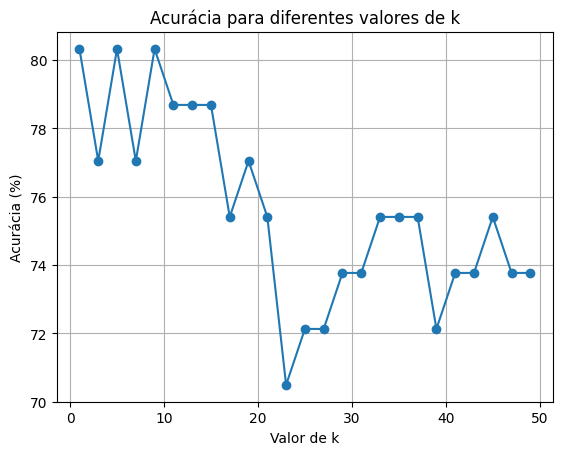

In [36]:
plt.plot(range(1, 50, 2), [a * 100 for a in accuracies], marker='o')
plt.title('Acurácia para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia (%)')
plt.grid()
plt.show()